In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Loading the data
file_path = 'marketing_campaign.xlsx'
df = pd.read_excel(file_path)

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [29]:
# Data Cleansing

# Check for missing values
missing_values = df.isnull().sum()

# Handling missing values: For simplicity, we'll remove rows with missing 'Income' values since it's important.
df_clean = df.dropna(subset=['Income'])

# Convert 'Education' and 'Marital_Status' to categorical
df_clean = pd.get_dummies(df_clean, columns=['Education', 'Marital_Status'], drop_first=True)

# Drop unnecessary columns (ID, Dt_Customer, Z_CostContact, Z_Revenue) as they don't impact modeling
df_clean = df_clean.drop(columns=['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'])

# Normalize numerical columns (Income, Kidhome, Teenhome, Recency, etc.)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                     'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

df_clean[numerical_columns] = scaler.fit_transform(df_clean[numerical_columns])

# Display the cleaned data
df_clean.head()


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,-0.986443,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,True,False,False,False,False,False,True,False,False,False
1,-1.236801,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,True,False,False,False,False,False,True,False,False,False
2,-0.318822,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,True,False,False,False,False,False,False,True,False,False
3,1.266777,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,True,False,False,False,False,False,False,True,False,False
4,1.016420,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,False,False,True,False,False,True,False,False,False,False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


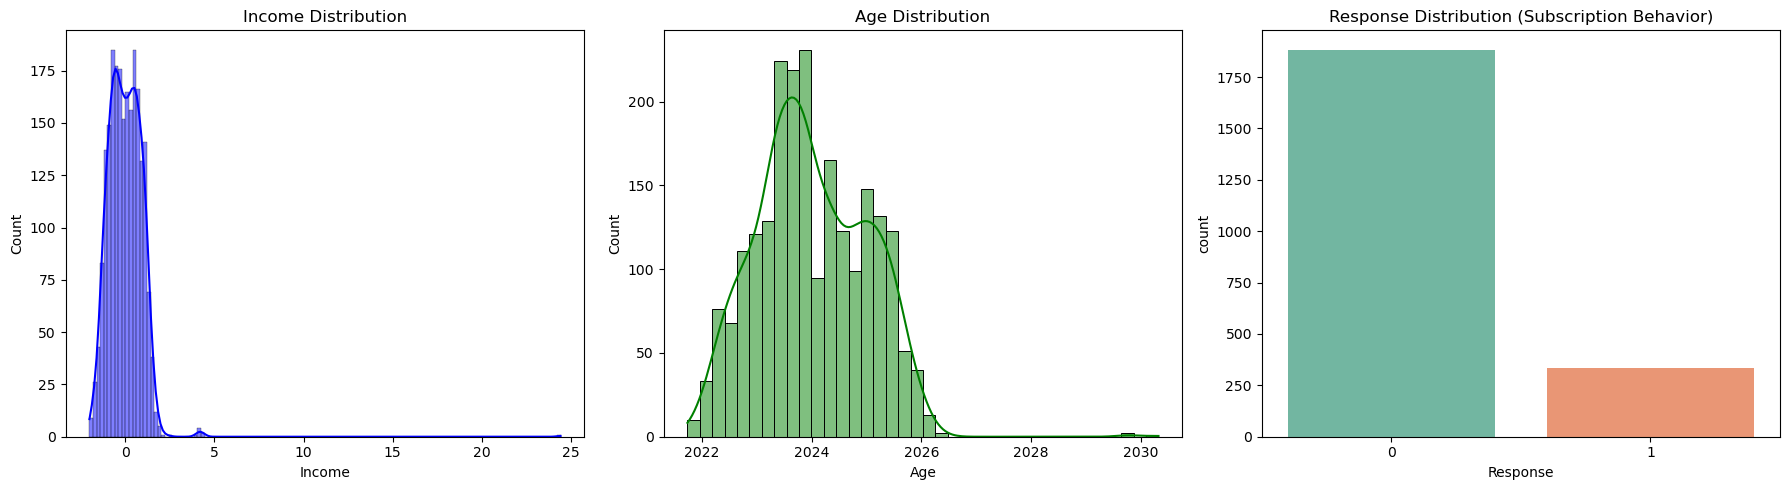

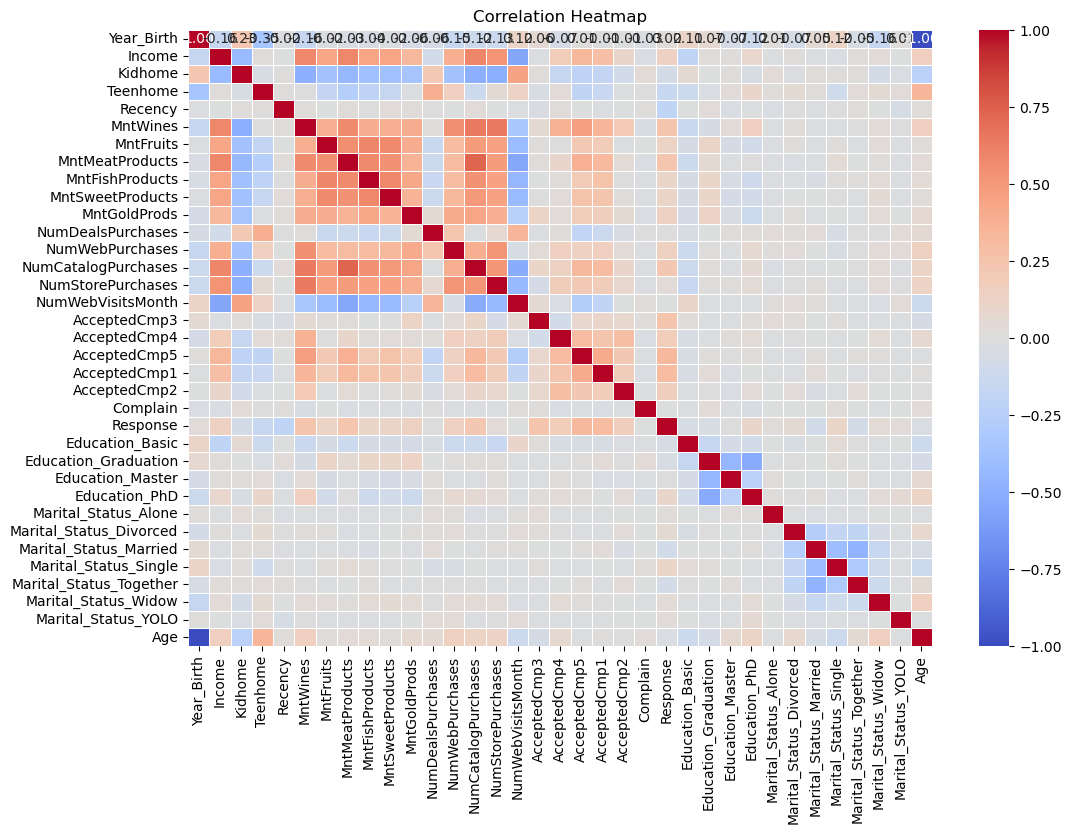

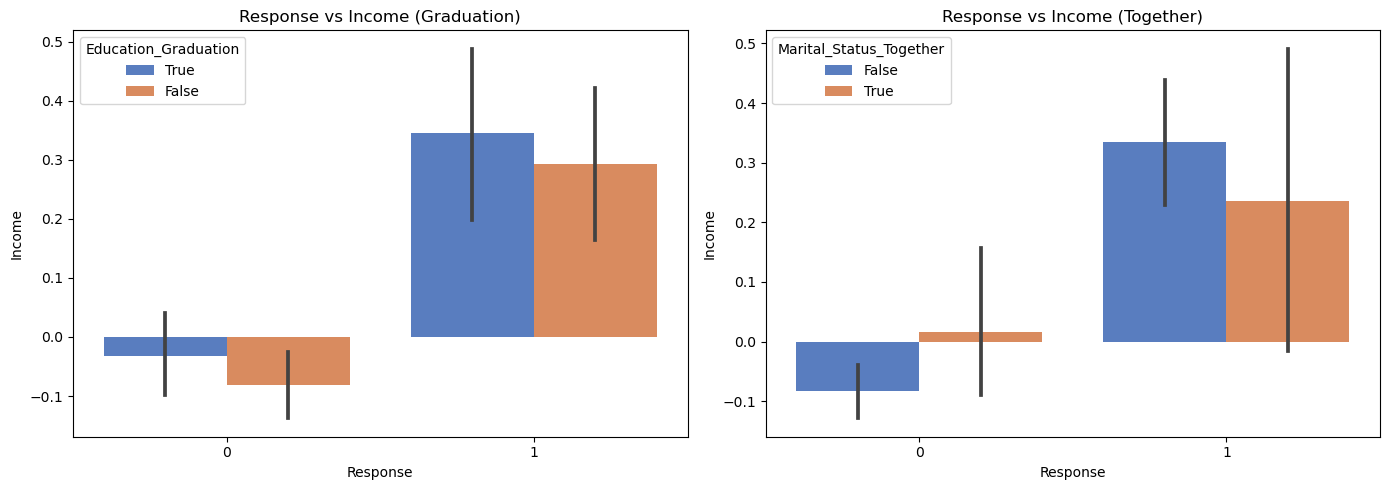

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,...,2.216000e+03,2.216000e+03,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,6.450516e-15,5.210433e-17,-1.122247e-16,4.168346e-17,-2.404815e-18,-3.366741e-17,-7.214446e-18,-5.771557e-17,-2.164334e-17,-1.122247e-17,...,-8.016051e-17,7.595208e-17,-5.771557e-17,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271
std,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,...,1.000226e+00,1.000226e+00,1.000226e+00,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417
min,-6.327410e+00,-2.007250e+00,-8.230393e-01,-9.289722e-01,-1.693488e+00,-9.046404e-01,-6.624630e-01,-7.447440e-01,-6.875744e-01,-6.582331e-01,...,-9.128373e-01,-1.784893e+00,-2.193591e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.195377e-01,-6.732620e-01,-8.230393e-01,-9.289722e-01,-8.642385e-01,-8.334770e-01,-6.121927e-01,-6.733896e-01,-6.327696e-01,-6.338802e-01,...,-9.128373e-01,-8.618303e-01,-9.563810e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.844093e-02,-3.439972e-02,-8.230393e-01,-9.289722e-01,-4.365786e-04,-3.872229e-01,-4.613818e-01,-4.414876e-01,-4.683552e-01,-4.634095e-01,...,-2.293274e-01,-2.464554e-01,2.808287e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.826092e-01,6.466600e-01,1.039938e+00,9.090657e-01,8.633654e-01,5.927571e-01,1.669967e-01,2.910105e-01,2.258390e-01,1.454144e-01,...,4.541825e-01,6.766069e-01,6.932320e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.268209e+00,2.441328e+01,2.902916e+00,2.747104e+00,1.727167e+00,3.522319e+00,4.339430e+00,6.948158e+00,4.043907e+00,5.722241e+00,...,8.656301e+00,2.215044e+00,6.054474e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
#Lets proceed with EDA

#  Descriptive Statistics
descriptive_stats = df_clean.describe()

#  Distribution Plots for Income, Age (calculated from Year_Birth), and Response

# Calculating Age from Year_Birth
df_clean['Age'] = 2024 - df_clean['Year_Birth']

# Plotting distribution of Income, Age, and Response
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Income distribution
sns.histplot(df_clean['Income'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Income Distribution')

# Age distribution
sns.histplot(df_clean['Age'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Age Distribution')

# Response count
sns.countplot(x='Response', data=df_clean, ax=axes[2], palette='Set2')
axes[2].set_title('Response Distribution (Subscription Behavior)')

plt.tight_layout()
plt.show()

#  Correlation Analysis
corr_matrix = df_clean.corr()

# Plotting correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#Categorical Variables vs Response (Bar plots)

# Convert boolean/int columns to string for categorical plotting
df_clean['Education_Graduation'] = df_clean['Education_Graduation'].astype(str)
df_clean['Marital_Status_Together'] = df_clean['Marital_Status_Together'].astype(str)

# Plotting Response against Education and Marital_Status
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Response vs Education
sns.barplot(x='Response', y='Income', hue='Education_Graduation', data=df_clean, ax=axes[0], palette='muted')
axes[0].set_title('Response vs Income (Graduation)')

# Response vs Marital Status
sns.barplot(x='Response', y='Income', hue='Marital_Status_Together', data=df_clean, ax=axes[1], palette='muted')
axes[1].set_title('Response vs Income (Together)')

plt.tight_layout()
plt.show()

# Show descriptive statistics
descriptive_stats


### Figure 1

Income: Most customers are concentrated in the lower income bracket, which could influence their decision-making process when subscribing to services.
Age: Middle-aged customers seem to dominate the dataset, which might affect how you approach targeting for subscriptions.
Response: There's a clear imbalance in the target variable (subscription behavior), which needs to be addressed to ensure the models do not become biased toward non-subscribers. This is why applying SMOTE was important to balance the dataset.


### Figure 2
Correlation Heatmap: Customers who accepted previous campaigns are more likely to subscribe again. Income and spending are also positively linked, especially for certain luxury items like wine and meat. Recent activity (Recency) seems to reduce the likelihood of subscription, suggesting that customers may need more time or engagement to subscribe.

Income Insights:-
Graduation: Graduates with higher incomes are more likely to subscribe, indicating that education level could be a predictor of subscription behavior.
Relationship Status: Those in a relationship tend to have higher incomes and are more likely to subscribe compared to single customers or those who didn’t subscribe.


### Figure 3
Descriptive Statistics: Your dataset includes a wide range of ages and incomes, but the distribution suggests that spending and subscription behavior are more likely among wealthier, middle-aged individuals.





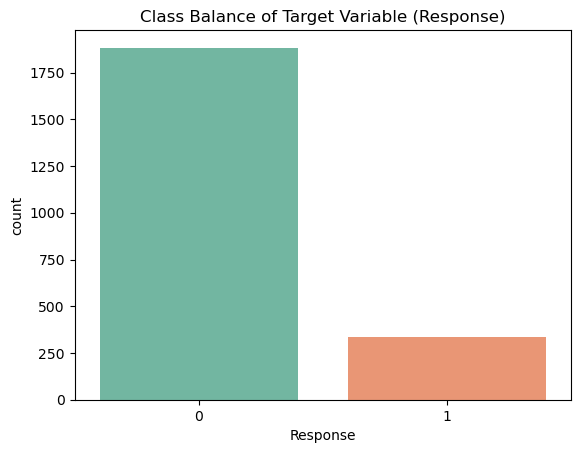

Class distribution:
Response
0    0.849729
1    0.150271
Name: proportion, dtype: float64
Class imbalance detected. Applying SMOTE to balance the dataset.
Class distribution before SMOTE:
Response
0    1501
1     271
Name: count, dtype: int64
Class distribution after SMOTE:
Response
1    1501
0    1501
Name: count, dtype: int64


In [50]:

# Identify non-numeric columns
non_numeric_cols = df_clean.select_dtypes(include=['object', 'bool']).columns

# Convert boolean columns to integers (True -> 1, False -> 0)
df_clean[non_numeric_cols] = df_clean[non_numeric_cols].apply(lambda x: x.astype('category').cat.codes)

#  Check for class balance of the target variable (Response)

# Plotting class balance
sns.countplot(x='Response', data=df_clean, palette='Set2')
plt.title('Class Balance of Target Variable (Response)')
plt.show()

# Proportion of each class
class_balance = df_clean['Response'].value_counts(normalize=True)
print(f"Class distribution:\n{class_balance}")

#  Handle class imbalance using SMOTE if imbalance exists

# Define the threshold for imbalance (if one class is less than 30% of the other, it's considered imbalanced)
imbalance_threshold = 0.3
if class_balance.min() / class_balance.max() < imbalance_threshold:
    print("Class imbalance detected. Applying SMOTE to balance the dataset.")
    
    # Split the data into features (X) and target (y)
    X = df_clean.drop(columns=['Response'])
    y = df_clean['Response']

    # Split the data into training and testing sets before applying SMOTE
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SMOTE to balance the training set
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Check the class distribution after applying SMOTE
    print("Class distribution before SMOTE:")
    print(y_train.value_counts())
    
    print("Class distribution after SMOTE:")
    print(y_train_smote.value_counts())
else:
    print("No significant class imbalance detected.")


From the figure given above, we can clearly see that the target variable is imbalanced. To handle this, we will be using SMOTE to balance the dataset.


Once the dataset is balanced, we can proceed with training the models (Logistic Regression, SVM, and Decision Tree)

In [41]:


#  Logistic Regression Model

# Build the logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_smote, y_train_smote)

# Predictions and model evaluation
y_pred_log = log_model.predict(X_test)

# Calculate accuracy, precision, recall
log_accuracy = accuracy_score(y_test, y_pred_log)
log_precision = precision_score(y_test, y_pred_log)
log_recall = recall_score(y_test, y_pred_log)

# Confusion Matrix
log_confusion = confusion_matrix(y_test, y_pred_log)

# Display Logistic Model performance
print(f"Logistic Regression - Accuracy: {log_accuracy:.4f}, Precision: {log_precision:.4f}, Recall: {log_recall:.4f}")
print(f"Confusion Matrix:\n{log_confusion}")


Logistic Regression - Accuracy: 0.8243, Precision: 0.4200, Recall: 0.6774
Confusion Matrix:
[[324  58]
 [ 20  42]]


In [49]:
# Support Vector Machine
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Function to train and evaluate SVM with a specified kernel
def evaluate_svm_kernel(X_train, y_train, X_test, y_test, kernel_type):
    svm_model = SVC(kernel=kernel_type, random_state=42)
    svm_model.fit(X_train, y_train)
    
    # Predictions and model evaluation
    y_pred_svm = svm_model.predict(X_test)
    
    # Calculate accuracy, precision, recall
    accuracy = accuracy_score(y_test, y_pred_svm)
    precision = precision_score(y_test, y_pred_svm)
    recall = recall_score(y_test, y_pred_svm)
    
    # Confusion Matrix
    confusion = confusion_matrix(y_test, y_pred_svm)
    
    print(f"SVM ({kernel_type}) - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    print(f"Confusion Matrix:\n{confusion}\n")
    
    # Return the metrics to be stored for later comparison
    return accuracy, precision, recall


# Initialize variables to store the metrics for each kernel
svm_linear_accuracy, svm_linear_precision, svm_linear_recall = 0, 0, 0
svm_rbf_accuracy, svm_rbf_precision, svm_rbf_recall = 0, 0, 0
svm_poly_accuracy, svm_poly_precision, svm_poly_recall = 0, 0, 0

# Evaluate SVM with different kernels and store results
for kernel in ['linear', 'rbf', 'poly']:
    print(f"Evaluating SVM with {kernel} kernel:")
    accuracy, precision, recall = evaluate_svm_kernel(X_train_smote, y_train_smote, X_test, y_test, kernel)
    
    # Store the results for each kernel
    if kernel == 'linear':
        svm_linear_accuracy, svm_linear_precision, svm_linear_recall = accuracy, precision, recall
    elif kernel == 'rbf':
        svm_rbf_accuracy, svm_rbf_precision, svm_rbf_recall = accuracy, precision, recall
    elif kernel == 'poly':
        svm_poly_accuracy, svm_poly_precision, svm_poly_recall = accuracy, precision, recall


Evaluating SVM with linear kernel:
SVM (linear) - Accuracy: 0.8266, Precision: 0.4242, Recall: 0.6774
Confusion Matrix:
[[325  57]
 [ 20  42]]

Evaluating SVM with rbf kernel:
SVM (rbf) - Accuracy: 0.7050, Precision: 0.2444, Recall: 0.5323
Confusion Matrix:
[[280 102]
 [ 29  33]]

Evaluating SVM with poly kernel:
SVM (poly) - Accuracy: 0.7095, Precision: 0.2481, Recall: 0.5323
Confusion Matrix:
[[282 100]
 [ 29  33]]



In [43]:


# Decision Tree Model (with max depth = 4)

# Build the decision tree model
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train_smote, y_train_smote)

# Predictions and model evaluation
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy, precision, recall
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)

# Confusion Matrix
dt_confusion = confusion_matrix(y_test, y_pred_dt)

# Display Decision Tree Model performance
print(f"Decision Tree - Accuracy: {dt_accuracy:.4f}, Precision: {dt_precision:.4f}, Recall: {dt_recall:.4f}")
print(f"Confusion Matrix:\n{dt_confusion}")


Decision Tree - Accuracy: 0.7973, Precision: 0.3727, Recall: 0.6613
Confusion Matrix:
[[313  69]
 [ 21  41]]


In [48]:

print("\nModel Comparison:")

# Logistic Regression results
print(f"Logistic Regression - Accuracy: {log_accuracy:.4f}, Precision: {log_precision:.4f}, Recall: {log_recall:.4f}")

# SVM (Linear Kernel) results
print(f"SVM (Linear Kernel) - Accuracy: {svm_linear_accuracy:.4f}, Precision: {svm_linear_precision:.4f}, Recall: {svm_linear_recall:.4f}")

# SVM (RBF Kernel) results
print(f"SVM (RBF Kernel) - Accuracy: {svm_rbf_accuracy:.4f}, Precision: {svm_rbf_precision:.4f}, Recall: {svm_rbf_recall:.4f}")

# SVM (Polynomial Kernel) results
print(f"SVM (Polynomial Kernel) - Accuracy: {svm_poly_accuracy:.4f}, Precision: {svm_poly_precision:.4f}, Recall: {svm_poly_recall:.4f}")

# Decision Tree results
print(f"Decision Tree - Accuracy: {dt_accuracy:.4f}, Precision: {dt_precision:.4f}, Recall: {dt_recall:.4f}")



Model Comparison:
Logistic Regression - Accuracy: 0.8243, Precision: 0.4200, Recall: 0.6774
SVM (Linear Kernel) - Accuracy: 0.8266, Precision: 0.4242, Recall: 0.6774
SVM (RBF Kernel) - Accuracy: 0.7050, Precision: 0.2444, Recall: 0.5323
SVM (Polynomial Kernel) - Accuracy: 0.7095, Precision: 0.2481, Recall: 0.5323
Decision Tree - Accuracy: 0.7973, Precision: 0.3727, Recall: 0.6613


### Model Comparision
Based on the evaluation metrics (accuracy, precision, recall), I would recommend Logistic Regression or SVM with a Linear Kernel as the best models for this dataset. Here’s why:

Performance: Both logistic regression and SVM (linear kernel) performed similarly, achieving the highest accuracy (~82.4% for logistic regression, ~82.7% for SVM linear), indicating that these models make the most correct predictions overall.

Precision and Recall:
Precision (Logistic Regression: 0.42, SVM Linear: 0.42): These values are moderate, meaning the models are fairly good at correctly identifying true positive cases (customers who subscribe). However, there's room for improvement, as the models are somewhat conservative in predicting "subscribers."
Recall (Logistic Regression: 0.6774, SVM Linear: 0.6774): These models are effective at identifying a good number of true positives (subscribers) without missing too many.

Both models balance precision and recall reasonably well, which is crucial for subscription models. The goal is to minimize false negatives (missing potential subscribers) while keeping false positives (incorrectly predicting a subscriber) under control.

### Key Variables to Focus On 
From earlier analysis (such as the correlation heatmap), the key variables influencing the subscription behavior are:

Accepted Campaigns (AcceptedCmp1, AcceptedCmp2, etc.):
Customers who previously accepted campaigns are more likely to subscribe again. This shows that a customer’s past behavior is highly predictive of future subscriptions.
Business Context: Marketing teams should prioritize targeting customers who have interacted with previous campaigns positively. Offering these customers personalized or premium offers might increase conversion rates.

Income:
Higher-income customers are more likely to subscribe, especially those purchasing luxury products like wine, meat, and gold.
Business Context: Marketing campaigns could benefit from segmenting higher-income customers for more tailored, premium services. Additionally, the business can design products or campaigns that appeal specifically to customers in lower-income brackets to increase engagement from this group.

Education (Graduation):
Graduated customers tend to have higher incomes and a higher likelihood of subscribing.
Business Context: Educational background seems to indicate a customer’s purchasing power and openness to subscribing. Campaigns could focus on educational content or products that align with this demographic.



I recommend Logistic Regression or SVM (Linear Kernel) for predicting subscription behavior due to their balanced accuracy, precision, and recall.

The key takeaway is that using a linear model like logistic regression with these important features can provide the business with actionable insights into customer behavior, helping them to increase conversion rates by focusing on the right customers with targeted marketing strategies.



# Conclusion

After comparing different models, Logistic Regression and SVM with a Linear Kernel were found to be the most accurate, with around 82% accuracy. Key factors influencing subscriptions include past campaign interactions, income, education, and marital status. Higher-income customers, those who accepted previous offers, and people in stable relationships are more likely to subscribe. The business should focus on these factors when targeting customers with personalized offers to increase subscription rates.

# References:
For SMOTE: Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). SMOTE: Synthetic minority over-sampling technique. Journal of Artificial Intelligence Research, 16, 321-357.

For Logistic Regression: Hosmer, D. W., Lemeshow, S., & Sturdivant, R. X. (2013). Applied Logistic Regression (3rd ed.). Wiley. 

For SVM (Support Vector Machines): Cortes, C., & Vapnik, V. (1995). Support-vector networks. Machine Learning, 20(3), 273–297. 
For Decision Trees: Breiman, L., Friedman, J. H., Olshen, R. A., & Stone, C. J. (1984). Classification and regression trees. Wadsworth International Group.